# Classification of Recyclable/Non-Recyclable Waste using Image Recognition

## Importing Libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Set up paths to the train and test directories

In [3]:
base_dir = r'dataset'
train_dir = base_dir + r'\TRAIN'
test_dir = base_dir + r'\TEST'

## Use ImageDataGenerator to prepare the data for training and testing

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 22564 images belonging to 3 classes.


In [6]:
print(train_data.class_indices)

{'N': 0, 'O': 1, 'R': 2}


In [7]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 2907 images belonging to 3 classes.


In [8]:
print(test_data.class_indices)

{'N': 0, 'O': 1, 'R': 2}


## Display sample images from each class

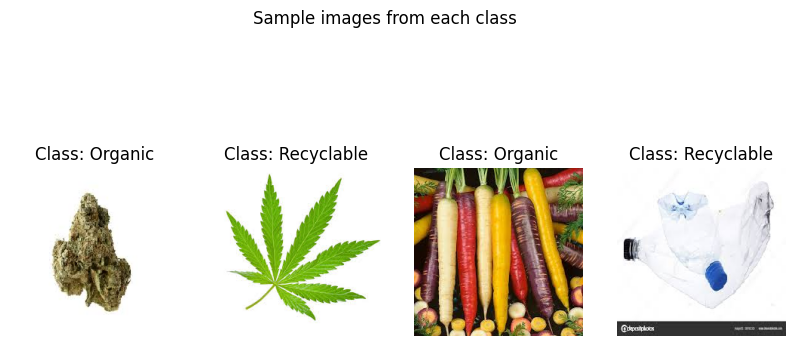

In [10]:
plt.figure(figsize=(10,5))
for i in range(4): # Display 4 images (2 from each calss if available)
    image, label = next(train_data)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])
    plt.title('Class: ' + ('Non-Recyclable' if label[1] == 0 else 'Organic' if label[1] == 1 else 'Recyclable'))
    plt.axis('off')
plt.suptitle('Sample images from each class')
plt.show()

## Load and Configure MobileNet Model

In [11]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R

## Train the Model

In [ ]:
history = model.fit(
    train_data,
    validation_data = test_data,
    epochs = 31
)

# After training the model, save it to a file
model.save('models/mobilenet_waste_classifier.h5')

loss, accuracy = model.evaluate(test_data)
print('Model Accuracy: ', accuracy)

Epoch 1/31
273/706 ━━━━━━━━━━━━━━━━━━━━ 2:52 399ms/step - accuracy: 0.5604 - loss: -4.8057